In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
img = np.array(Image.open('assets/image.png'))

In [3]:
def bilinearInterpolatePixel(imgArr, posX, posY):
    #Get integer and fractional parts of numbers
    modXi = int(posX)
    modYi = int(posY)
    modXf = posX - modXi
    modYf = posY - modYi
    modXiPlusOneLim = min(modXi+1,imgArr.shape[1]-1)
    modYiPlusOneLim = min(modYi+1,imgArr.shape[0]-1)

    #Get pixels in four corners
    bl = imgArr[modYi, modXi]
    br = imgArr[modYi, modXiPlusOneLim]
    tl = imgArr[modYiPlusOneLim, modXi]
    tr = imgArr[modYiPlusOneLim, modXiPlusOneLim]

    #Calculate interpolation
    b = modXf * br + (1. - modXf) * bl
    t = modXf * tr + (1. - modXf) * tl
    pxf = modYf * t + (1. - modYf) * b

    return pxf+0.5

def resize_image(img_to_resize, scale_factor):
    enlargedShape = [img_to_resize.shape[0] * scale_factor, img_to_resize.shape[1] * scale_factor]
    enlargedImg = np.empty(enlargedShape, dtype=np.uint8)

    for r in range(enlargedShape[0]):
        for c in range(enlargedShape[1]):
            orir = r / scale_factor
            oric = c / scale_factor
            enlargedImg[r, c] = bilinearInterpolatePixel(img_to_resize, oric, orir)
            
    return enlargedImg

In [4]:
img_big = resize_image(img, 4)

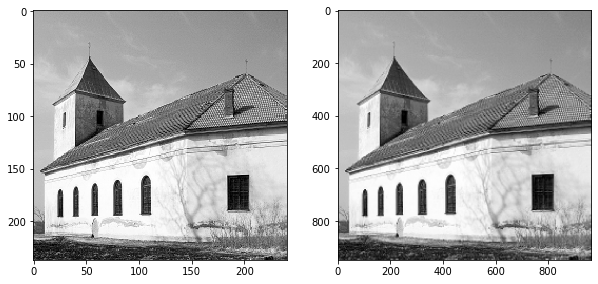

In [5]:
_, axarr = plt.subplots(1, 2, figsize=(10, 10))
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(img_big, cmap='gray')

In [6]:
print(f'Original image size: {img.shape}')
print(f'Scaled image size: {img_big.shape}')

Original image size: (237, 241)
Scaled image size: (948, 964)
